In [1]:
import pandas as pd
import datetime

In [2]:
df = pd.read_csv("ml100.txt")

In [3]:
df.columns = ["user","item","rate","timeStamp"]

### Unique Items

In [4]:
df.item.nunique()

1682

### Unique users

In [5]:
df.user.nunique()

943

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 4 columns):
user         99999 non-null int64
item         99999 non-null int64
rate         99999 non-null int64
timeStamp    99999 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


In [7]:
df.head()

,user,item,rate,timeStamp
0,259,286,4,874724727
1,259,298,4,874724754
2,259,185,4,874724781
3,259,173,4,874724843
4,259,108,4,874724882


In [8]:
#df['timeStamp'] = pd.to_datetime(df.timeStamp)
df['timeStamp'] = df.timeStamp.apply(lambda x : datetime.datetime.fromtimestamp(x))

In [9]:
df.head()

,user,item,rate,timeStamp
0,259,286,4,1997-09-20 06:05:27
1,259,298,4,1997-09-20 06:05:54
2,259,185,4,1997-09-20 06:06:21
3,259,173,4,1997-09-20 06:07:23
4,259,108,4,1997-09-20 06:08:02


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 4 columns):
user         99999 non-null int64
item         99999 non-null int64
rate         99999 non-null int64
timeStamp    99999 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 3.1 MB


In [11]:
df.timeStamp.min()

Timestamp('1997-09-20 06:05:27')

In [12]:
df.timeStamp.max()

Timestamp('1998-04-23 01:10:38')

In [13]:
diff = df.timeStamp.max() - df.timeStamp.min()

In [14]:
diff

Timedelta('214 days 19:05:11')

### Count of ratings per day


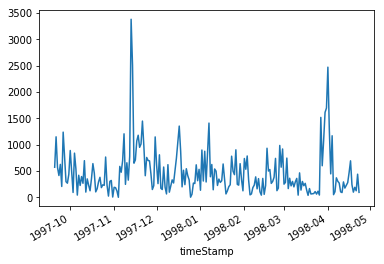

In [16]:
countOfR = df.groupby(pd.DatetimeIndex(df['timeStamp']).normalize()).count()
countOfR.user.plot()

In [17]:
countOfR.user.min()

2

In [18]:
countOfR.user.max()

3384

### How many each user visit the system   

In [19]:
df.groupby("user").count().item.max()

737

In [20]:
df.groupby("user").count().item.min()

20

In [21]:
df.groupby("user").count().item.mean()

106.04347826086956

### How many each item was visited in the system

In [22]:
df.groupby("item").count().user.max()

583

In [23]:
df.groupby("item").count().user.min()

1

In [24]:
df.groupby("item").count().user.mean()

59.45243757431629

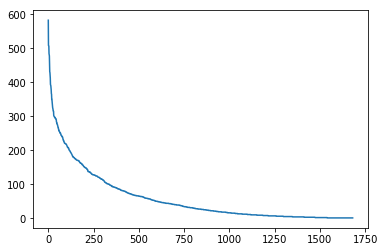

In [25]:
df.groupby("item").count().sort_values(["user"],ascending=[0]).reset_index().user.plot()